# Laboratorio 05

## Importaciones

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

## Punto 1

¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

El area de una región comprendida por un angulo es:

\begin{equation}
A_s = \frac{\theta r^2}{2}
\end{equation}

El area triangular es base por altura, siendo esta:

\begin{equation}
A_t = r^2 \cos(\frac{\theta}{2}) \sin(\frac{\theta}{2})
\end{equation}

la región de interes es la diferencia entre ambas, y esta, tiene que ser menor a una cuarta parte de toda el area de la circunferencia. Dando:

\begin{equation}
A_s - A_t = \frac{\pi r^2}{4}
\end{equation}

reemplazando $A_s$ y $A_t$:

\begin{equation}
\frac{\theta r^2}{2} - r^2 \cos(\frac{\theta}{2}) \sin(\frac{\theta}{2}) = \frac{\pi r^2}{4}
\end{equation}

Ya para finalizar,dividimos por $r^2$, multiplicamospor 2, y usamos la identidad de suma de angulos de seno. Quedando:

\begin{equation}
\theta - \sin(\theta) = \frac{\pi}{2}
\end{equation}

### Calculando lo necesario

In [3]:
F_ang = lambda ang: ang - np.sin(ang) - np.pi/2

In [4]:
P1_muestra = 1000
P1_ang_ini = 0
P1_ang_fin = 2*np.pi
P1_angulo = np.linspace(P1_ang_ini,P1_ang_fin,P1_muestra)
P1_funcion = F_ang(P1_angulo)

### Grafica con pandas

In [5]:
Frame = pd.DataFrame(np.array([P1_angulo,P1_funcion]).T,columns=["angulo","funcion"])
Frame

,angulo,funcion
0,0.000000,-1.570796
1,0.006289,-1.570796
2,0.012579,-1.570796
3,0.018868,-1.570795
4,0.025158,-1.570794
...,...,...
995,6.258027,4.712386
996,6.264317,4.712388
997,6.270606,4.712389
998,6.276896,4.712389


### Grafica con matplotlib

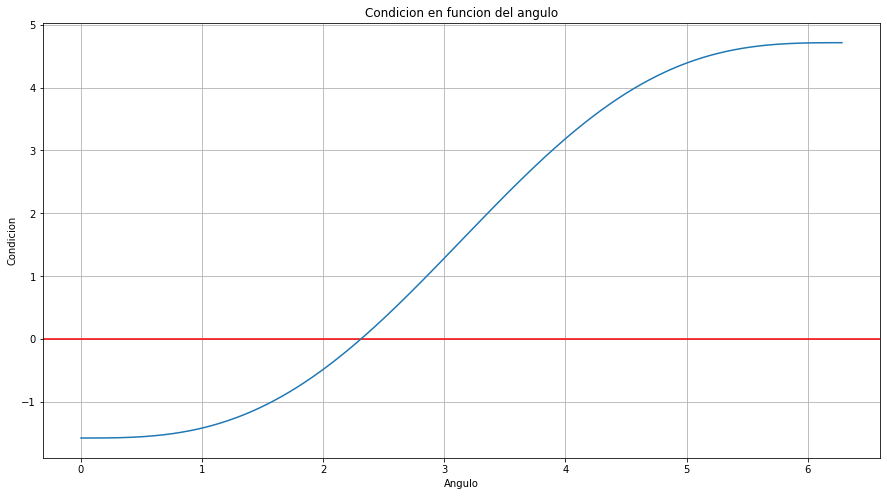

In [6]:
plt.figure(figsize=(15,8))
plt.axhline(0, color="r")
plt.plot(P1_angulo,P1_funcion)
plt.title("Condicion en funcion del angulo")
plt.xlabel("Angulo")
plt.ylabel("Condicion")
plt.grid()
plt.show()

### Encontrando el valor donde la funcion se vuelve 0 (Se cumple la condición objetivo)

#### Intuitivo

In [7]:
Frame[abs(Frame["funcion"]) < 0.01]

,angulo,funcion
367,2.308237,-0.002751
368,2.314527,0.007782


#### Bisección

In [8]:
P1_val_a = 2
P1_val_b = 3
opt.bisect(F_ang,P1_val_a,P1_val_b)

2.309881460010729

#### Punto fijo

In [9]:
P1_punto_fijo = 1
P1_comparador = lambda ang: ang - F_ang(ang)
opt.fixed_point(P1_comparador, P1_punto_fijo)

array(2.30988146)

#### Newton

In [10]:
P1_xo_newton = 1
P1_Fprima = lambda ang: 1 - np.cos(ang)
opt.newton(F_ang,P1_xo_newton,P1_Fprima)

2.309881460010057

#### Secante

In [11]:
opt.newton(F_ang,P1_xo_newton)

2.3098814600100575

## Punto 2

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

In [12]:
P2_g = 32.17
P2_so = 300
P2_m = 0.25
P2_k = 0.1

In [13]:
def F_caida(t,so,g,m,k):
    return so - (m*g/k)*t + ((m**2)*g/k)*t*(1 - np.e**(-k*t/m))

### Bisección

In [14]:
P2_val_a = 0
P2_val_b = 50
opt.bisect(F_caida,P2_val_a,P2_val_b,(P2_so,P2_g,P2_m,P2_k))

4.736139137604312

### Punto fijo

In [15]:
P2_punto_fijo = 4
opt.fixed_point(F_caida,P2_punto_fijo,(P2_so,P2_g,P2_m,P2_k))

array(4.65534478)

### Newton

In [16]:
def F_caida_prima(t,so,g,m,k):
    return -(m*g/k) + ((m**2)*g/k)*(1 - np.e**(-k*t/m)*(1 - t*k/m))

In [17]:
P2_xo_newton = 2
opt.newton(F_caida,P2_xo_newton,F_caida_prima,(P2_so,P2_g,P2_m,P2_k))

4.73613913760349

### Secante

In [18]:
opt.newton(F_caida,P2_xo_newton,args=(P2_so,P2_g,P2_m,P2_k))

4.73613913760349

## Punto 3

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

Para T = 0.5, determine:

De la igualdad anterior se tiene:

\begin{equation}
F(T) = 0 =  \tanh\left( \frac{m(T)}{T} \right) - m(T)
\end{equation}

In [1]:
def magne_media(m,T): 
    return np.tanh(m/0.5) - m

In [2]:
P3_To = 0.5

### sub punto a

La magnetización reducida empleando el metodo de la secante (Muestre su resultado con 4 cifras)

In [9]:
P3_xo_newton = 3
opt.newton(magne_media,P3_xo_newton,args=(P3_To))

TypeError: Value after * must be an iterable, not float

### sub punto b

Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [21]:
P3_punto_fijo = 0.95
opt.fixed_point(magne_media,P3_punto_fijo)

array(3.26665599e-05)

### sub punto d

Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [22]:
P3_val_T = np.linspace(0.1,0.99,100)

In [ ]:
P3_val_mag = np.zeros(len(P3_val_T))
for i in range(0,len(P3_val_T)):
    
    P3_val_T[i] = opt.newton(magne_media,P3_xo_newton)

## Punto 5

\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}

\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


### Parte 1 (método Newton-Raphson)

### Parte 2 (replicar el código y entender) (Nota: Voy a usar comentarios)

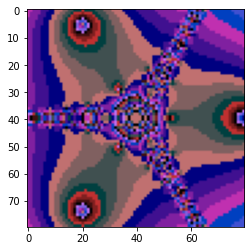

In [23]:
"""
import numpy as np
import matplotlib.pylab as plt
"""
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)